In [96]:
# %matplotlib inline

import test
from datetime import datetime as dt
import matplotlib.pyplot as plt
import scipy.signal as sg
import pandas as pd
from sklearn.metrics import accuracy_score as acc
from sklearn.pipeline import make_pipeline as mp
import numpy as np

pd.plotting.register_matplotlib_converters()

In [97]:
Fs=8
data_o = test.testbed(start=dt(2020,1,1),stop=dt(2021,8,1),Fs=Fs,interval='15minutes')


Starting dump run for date range 2020-01-01 00:00:00 - 2021-08-01 00:00:00 @interval=15minutes



In [ ]:
data_o[['lmda1','dr1','al1','k1','k2','al2','dr2','lmda2','w1','w2','w1_n','w2_n']].describe()

,lmda1,dr1,al1,k1,k2,al2,dr2,lmda2,w1,w2,w1_n,w2_n
count,5.546000e+04,5.546000e+04,5.546000e+04,55460.0,55460.0,5.546000e+04,5.546000e+04,5.546000e+04,5.546000e+04,5.546000e+04,55460.0,55460.0
mean,3.202951e-20,-9.608854e-20,3.683394e-19,1.0,1.0,-1.034954e-18,-1.721586e-18,5.424999e-19,8.968264e-19,-5.124722e-19,1.0,-1.0
std,1.337233e-02,1.337233e-02,1.337233e-02,0.0,0.0,1.582769e-02,1.582769e-02,1.582769e-02,4.206857e-02,3.490015e-02,0.0,0.0
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.0,1.0,-9.684480e-01,-9.684480e-01,-9.684480e-01,-1.483633e-02,-9.290044e-03,1.0,-1.0
25%,-8.814527e-04,-8.814527e-04,-8.814527e-04,1.0,1.0,-4.061976e-03,-4.061976e-03,-4.061976e-03,-1.483633e-02,-9.290044e-03,1.0,-1.0
50%,1.406939e-03,1.406939e-03,1.406939e-03,1.0,1.0,6.724592e-05,6.724592e-05,6.724592e-05,-1.483633e-02,-9.290044e-03,1.0,-1.0
75%,3.733187e-03,3.733187e-03,3.733187e-03,1.0,1.0,4.000586e-03,4.000586e-03,4.000586e-03,-1.483633e-02,-9.290044e-03,1.0,-1.0
max,1.731336e-01,1.731336e-01,1.731336e-01,1.0,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,-1.0


In [ ]:
sig = data_o[['dv1t_o','dr1','ma1','TE1','ft1','w1','q1','x1_gn','x1_pr','idposc','Fmm','Fma','Mam','Maa','vc_pwr','vc_c','x2_gn','x2_pr','q2','w2','ft2','TE2','ma2','dr2','dc1t_o']]

array([<AxesSubplot:xlabel='dt'>, <AxesSubplot:xlabel='dt'>,
       <AxesSubplot:xlabel='dt'>], dtype=object)

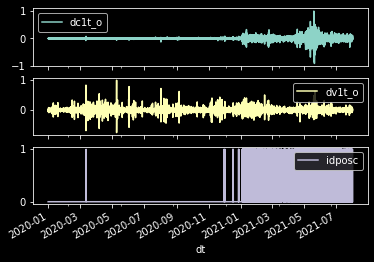

In [ ]:
sig[['dc1t_o','dv1t_o','idposc']].plot(subplots=True)

In [ ]:
sig.dc1t_o[sig.idposc==1].sum()

151.430054726741

In [ ]:
sig.dc1t_o[sig.idposc==0].sum()

-142.41341179998489

In [ ]:
data_o.columns.values

array(['l', 'h', 'o', 'c', 'v', 'c1t_1', 'dc1t_o', 'c1rt_1', 'c1angt_1',
       'c2t_1', 'dc2t_o', 'c2rt_1', 'c2angt_1', 'c2to_1', 'dc2t_oo',
       'dc2angt_o', 'c3t_1', 'dc3t_o', 'c3rt_1', 'c3angt_1', 'c3to_1',
       'dc3t_oo', 'dc3angt_o', 'c3too_1', 'dc3t_ooo', 'v1t_1', 'dv1t_o',
       'v1rt_1', 'v1angt_1', 'v2t_1', 'dv2t_o', 'v2rt_1', 'v2angt_1',
       'v2to_1', 'dv2t_oo', 'dv2angt_o', 'v3t_1', 'dv3t_o', 'v3rt_1',
       'v3angt_1', 'v3to_1', 'dv3t_oo', 'dv3angt_o', 'v3too_1',
       'dv3t_ooo', 'vc_pwr', 'vc_r', 'vc_c', 'idposc', 'al1', 'al2',
       'x1_gn', 'x2_gn', 'x1_pr', 'x2_pr', 'al1n', 'al2n', 'Mam', 'Maa',
       'ft1', 'ft2', 'Fmm', 'Fma', 'k1', 'k2', 'Km', 'Ka', 'Alm', 'Ala',
       'Alnm', 'Alna', 'ac1', 'ac2', 'ma1', 'ma2', 'w1_n', 'w2_n', 'dr1',
       'dr2', 'Drm', 'Dra', 'w1', 'w2', 'fr1', 'fr2', 'lmda1', 'lmda2',
       'Lmm', 'Lma', 'q1', 'q2', 'Qfm', 'Qfa', 'PE1', 'KE1', 'TE1', 'PE2',
       'KE2', 'TE2', 'Pxm', 'Pxa', 'vc_wrk', 'v_fft', 'fft_freq', 'vf_t',


In [ ]:
sig.describe()

,dv1t_o,dr1,ma1,TE1,ft1,w1,q1,x1_gn,x1_pr,idposc,...,vc_c,x2_gn,x2_pr,q2,w2,ft2,TE2,ma2,dr2,dc1t_o
count,5.546000e+04,5.546000e+04,5.546000e+04,5.546000e+04,5.546000e+04,5.546000e+04,5.546000e+04,5.546000e+04,5.546000e+04,55460.000000,...,5.546000e+04,5.546000e+04,5.546000e+04,55460.000000,5.546000e+04,5.546000e+04,5.546000e+04,5.546000e+04,5.546000e+04,55460.000000
mean,2.716566e-19,-9.608854e-20,-3.689800e-17,1.201107e-20,-2.242066e-19,8.968264e-19,-2.502306e-21,-4.099778e-18,2.722509e-19,0.064713,...,-2.001845e-21,-4.790414e-18,7.607010e-20,0.000000,-5.124722e-19,2.562361e-19,1.521402e-19,1.921771e-19,-1.721586e-18,0.000163
std,3.299745e-02,1.337233e-02,5.930147e-01,1.151195e-02,3.729361e-02,4.206857e-02,4.257628e-03,7.071132e-01,3.314376e-02,0.246022,...,1.025628e-02,2.093200e-01,3.631661e-02,0.004428,3.490015e-02,4.006965e-02,9.875016e-03,1.699458e-01,1.582769e-02,0.036321
min,-7.528350e-01,-1.000000e+00,-7.706079e-01,-1.000000e+00,-1.000000e+00,-1.483633e-02,-1.000000e+00,-1.000000e+00,-7.574934e-01,0.000000,...,-6.742476e-01,-1.000000e+00,-9.161437e-01,-1.000000,-9.290044e-03,-1.000000e+00,-1.000000e+00,-8.652304e-01,-9.684480e-01,-0.915961
25%,-7.143426e-03,-8.814527e-04,-5.623360e-01,1.038228e-03,-6.068852e-03,-1.483633e-02,1.647060e-05,-7.070667e-01,-7.488577e-03,0.000000,...,-1.264416e-04,-1.238710e-01,-4.007807e-03,-0.000003,-9.290044e-03,-2.703584e-03,8.884278e-04,-9.453686e-02,-4.061976e-03,-0.003823
50%,-3.770408e-04,1.406939e-03,-1.986241e-01,1.517129e-03,2.620025e-03,-1.483633e-02,1.742562e-05,5.113711e-12,-3.853084e-04,0.000000,...,-7.711262e-05,-3.248756e-11,-5.297703e-05,0.000009,-9.290044e-03,3.189066e-03,1.133699e-03,-3.540190e-03,6.724592e-05,0.000112
75%,6.199628e-03,3.733187e-03,6.064941e-01,1.598509e-03,8.372828e-03,-1.483633e-02,1.868985e-05,7.070667e-01,6.445608e-03,0.000000,...,-3.233066e-05,1.238710e-01,4.159205e-03,0.000025,-9.290044e-03,6.948220e-03,1.165401e-03,9.159651e-02,4.000586e-03,0.004311
max,1.000000e+00,1.731336e-01,1.000000e+00,1.758048e-03,9.218112e-01,1.000000e+00,5.878535e-02,1.000000e+00,1.000000e+00,1.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,0.157210,1.000000e+00,9.487228e-01,1.360785e-03,1.000000e+00,1.000000e+00,1.000000


In [ ]:
# pd.plotting.autocorrelation_plot(sig.vc_pwr)

In [ ]:
# pd.plotting.autocorrelation_plot(sig.vc_c)

In [ ]:
# pd.plotting.lag_plot(sig.vc_pwr)

In [ ]:
# pd.plotting.lag_plot(sig.vc_c)

array([[<AxesSubplot:title={'center':'Fma'}, xlabel='[idposc]'>,
        <AxesSubplot:title={'center':'Fmm'}, xlabel='[idposc]'>,
        <AxesSubplot:title={'center':'Maa'}, xlabel='[idposc]'>,
        <AxesSubplot:title={'center':'Mam'}, xlabel='[idposc]'>,
        <AxesSubplot:title={'center':'TE1'}, xlabel='[idposc]'>],
       [<AxesSubplot:title={'center':'TE2'}, xlabel='[idposc]'>,
        <AxesSubplot:title={'center':'dc1t_o'}, xlabel='[idposc]'>,
        <AxesSubplot:title={'center':'dr1'}, xlabel='[idposc]'>,
        <AxesSubplot:title={'center':'dr2'}, xlabel='[idposc]'>,
        <AxesSubplot:title={'center':'dv1t_o'}, xlabel='[idposc]'>],
       [<AxesSubplot:title={'center':'ft1'}, xlabel='[idposc]'>,
        <AxesSubplot:title={'center':'ft2'}, xlabel='[idposc]'>,
        <AxesSubplot:title={'center':'ma1'}, xlabel='[idposc]'>,
        <AxesSubplot:title={'center':'ma2'}, xlabel='[idposc]'>,
        <AxesSubplot:title={'center':'q1'}, xlabel='[idposc]'>],
       [<AxesSubp

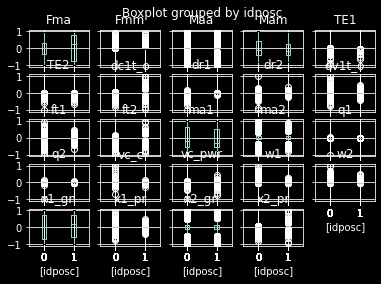

In [ ]:
sig.boxplot(by='idposc')

In [ ]:
# pd.plotting.andrews_curves(sig,'idposc')

In [ ]:
# pd.plotting.parallel_coordinates(sig,'idposc')

(array([2.08413783e-04, 1.61050303e-04, 1.05267109e-04, ...,
        3.08445505e-05, 2.42906976e-05, 3.05249098e-05]),
 array([0.00000000e+00, 1.44248107e-04, 2.88496213e-04, ...,
        3.99971150e+00, 3.99985575e+00, 4.00000000e+00]),
 <matplotlib.lines.Line2D at 0x21c20250>)

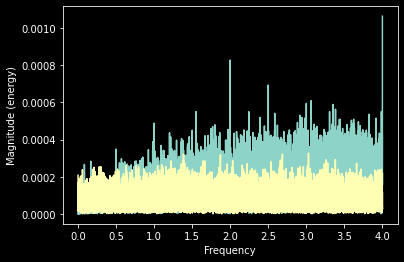

In [ ]:
plt.magnitude_spectrum(sig.dv1t_o,Fs=Fs)
plt.magnitude_spectrum(sig.dc1t_o,Fs=Fs)

In [ ]:
# f,s = sg.periodogram(sig.dv1t_o)
# plt.semilogy(f,np.sqrt(s))
# f,s = sg.periodogram(sig.dc1t_o)
# plt.semilogy(f,np.sqrt(s))

In [ ]:
sig0 = sig[sig.idposc==0]
sig1 = sig[sig.idposc==1]

In [ ]:
sig0.drop('idposc',axis=1).describe()

,dv1t_o,dr1,ma1,TE1,ft1,w1,q1,x1_gn,x1_pr,Fmm,...,vc_c,x2_gn,x2_pr,q2,w2,ft2,TE2,ma2,dr2,dc1t_o
count,51871.000000,51871.000000,51871.000000,51871.000000,51871.000000,51871.000000,5.187100e+04,51871.000000,51871.000000,51871.000000,...,51871.000000,51871.000000,51871.000000,51871.000000,51871.000000,51871.000000,51871.000000,51871.000000,51871.000000,51871.000000
mean,-0.000389,-0.000068,0.004470,0.000354,-0.000264,0.000749,-7.128309e-07,-0.004895,-0.000377,-0.004077,...,0.000014,0.000133,-0.002908,-0.000002,0.000121,-0.001903,0.000403,-0.000357,-0.000205,-0.002746
std,0.030905,0.013791,0.594050,0.010434,0.035206,0.043138,4.400886e-03,0.708291,0.031048,0.036004,...,0.010460,0.208208,0.024369,0.004571,0.035115,0.028931,0.007658,0.169426,0.015660,0.024370
min,-0.752835,-1.000000,-0.770608,-1.000000,-1.000000,-0.014836,-1.000000e+00,-1.000000,-0.757493,-0.026527,...,-0.674248,-1.000000,-0.841391,-1.000000,-0.009290,-1.000000,-1.000000,-0.865230,-0.968448,-0.841405
25%,-0.006922,-0.001030,-0.561673,0.001179,-0.005694,-0.014836,1.640454e-05,-0.713129,-0.007262,-0.022040,...,-0.000122,-0.123212,-0.003999,-0.000003,-0.009290,-0.002447,0.000974,-0.094809,-0.004089,-0.003786
50%,-0.000447,0.001426,-0.187226,0.001534,0.002567,-0.014836,1.733839e-05,-0.012915,-0.000460,-0.015312,...,-0.000077,0.000086,-0.000208,0.000009,-0.009290,0.003085,0.001141,-0.003753,0.000054,-0.000037
75%,0.005609,0.003868,0.614397,0.001600,0.007877,-0.014836,1.867126e-05,0.706345,0.005878,-0.000011,...,-0.000039,0.123509,0.003206,0.000025,-0.009290,0.006271,0.001166,0.091172,0.003828,0.003336
max,1.000000,0.173134,1.000000,0.001652,0.921811,1.000000,5.878535e-02,1.000000,1.000000,0.916132,...,1.000000,1.000000,0.054798,0.157210,1.000000,0.140504,0.001361,1.000000,1.000000,0.054614


In [ ]:
sig1.drop('idposc',axis=1).describe()

,dv1t_o,dr1,ma1,TE1,ft1,w1,q1,x1_gn,x1_pr,Fmm,...,vc_c,x2_gn,x2_pr,q2,w2,ft2,TE2,ma2,dr2,dc1t_o
count,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,...,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000
mean,0.005626,0.000979,-0.064605,-0.005119,0.003815,-0.010823,0.000010,0.070747,0.005443,0.058921,...,-0.000204,-0.001920,0.042027,0.000028,-0.001751,0.027502,-0.005824,0.005163,0.002956,0.042193
std,0.054665,0.003690,0.574050,0.021132,0.059700,0.018117,0.000448,0.686075,0.054878,0.075680,...,0.006642,0.224806,0.099560,0.001052,0.031588,0.109124,0.024965,0.177238,0.017817,0.099576
min,-0.392801,-0.093345,-0.761199,-0.639456,-0.677448,-0.014836,-0.026680,-1.000000,-0.395734,-0.025654,...,-0.252108,-0.987932,-0.916144,-0.010228,-0.009290,-0.900074,-0.620532,-0.793744,-0.251166,-0.915961
25%,-0.014000,0.000423,-0.567145,-0.004118,-0.015742,-0.014836,0.000017,-0.609203,-0.013862,0.014347,...,-0.000244,-0.133184,-0.005180,-0.000008,-0.009290,-0.021432,-0.003531,-0.089677,-0.003819,-0.004948
50%,0.003106,0.001317,-0.284206,-0.000588,0.004797,-0.014836,0.000018,0.160182,0.002605,0.041055,...,-0.000037,-0.001950,0.058598,0.000006,-0.009290,0.043327,-0.000471,-0.000179,0.000443,0.058663
75%,0.022967,0.002199,0.491523,0.000957,0.023532,-0.014836,0.000019,0.716773,0.023310,0.079433,...,0.000183,0.129120,0.085850,0.000028,-0.009290,0.084598,0.000436,0.101071,0.007007,0.086138
max,0.506850,0.022137,0.986536,0.001758,0.485362,0.291643,0.000618,0.999995,0.505611,1.000000,...,0.163552,0.978370,1.000000,0.059323,0.497909,0.948723,0.001202,0.894488,0.346671,1.000000


array([[<AxesSubplot:title={'center':'dv1t_o'}>,
        <AxesSubplot:title={'center':'dr1'}>,
        <AxesSubplot:title={'center':'ma1'}>,
        <AxesSubplot:title={'center':'TE1'}>,
        <AxesSubplot:title={'center':'ft1'}>],
       [<AxesSubplot:title={'center':'w1'}>,
        <AxesSubplot:title={'center':'q1'}>,
        <AxesSubplot:title={'center':'x1_gn'}>,
        <AxesSubplot:title={'center':'x1_pr'}>,
        <AxesSubplot:title={'center':'Fmm'}>],
       [<AxesSubplot:title={'center':'Fma'}>,
        <AxesSubplot:title={'center':'Mam'}>,
        <AxesSubplot:title={'center':'Maa'}>,
        <AxesSubplot:title={'center':'vc_pwr'}>,
        <AxesSubplot:title={'center':'vc_c'}>],
       [<AxesSubplot:title={'center':'x2_gn'}>,
        <AxesSubplot:title={'center':'x2_pr'}>,
        <AxesSubplot:title={'center':'q2'}>,
        <AxesSubplot:title={'center':'w2'}>,
        <AxesSubplot:title={'center':'ft2'}>],
       [<AxesSubplot:title={'center':'TE2'}>,
        <AxesSubplo

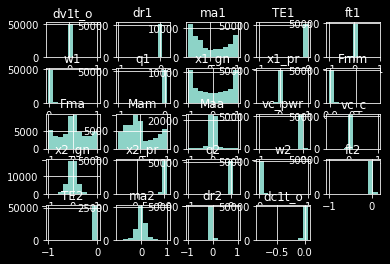

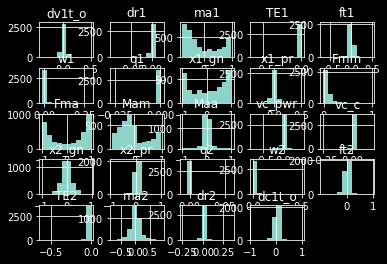

In [ ]:
sig0.drop('idposc',axis=1).hist()
sig1.drop('idposc',axis=1).hist()

In [ ]:
sigb     = ((sig.idposc == 1) 
                        & (sig.idposc.shift(1) == 0)) | ((sig.idposc == 0) 
                        & (sig.idposc.shift(-1) == 1))

In [ ]:
sigtr = sig[sigb]
sigtr.drop('idposc',axis=1).describe()

,dv1t_o,dr1,ma1,TE1,ft1,w1,q1,x1_gn,x1_pr,Fmm,...,vc_c,x2_gn,x2_pr,q2,w2,ft2,TE2,ma2,dr2,dc1t_o
count,2686.000000,2686.000000,2686.000000,2686.000000,2686.000000,2686.000000,2686.000000,2686.000000,2686.000000,2686.000000,...,2686.000000,2686.000000,2686.000000,2.686000e+03,2686.000000,2686.000000,2686.000000,2686.000000,2686.000000,2686.000000
mean,0.004133,0.001018,-0.050252,-0.002739,0.002217,-0.008836,0.000006,0.056407,0.003986,0.041988,...,0.000273,-0.008013,-0.030640,2.679522e-05,0.006346,-0.045360,-0.006677,0.006907,-0.000163,-0.030493
std,0.049976,0.004452,0.581569,0.013998,0.055646,0.022398,0.000520,0.693236,0.050112,0.078555,...,0.021176,0.216783,0.073195,1.228743e-03,0.050004,0.088639,0.033812,0.170014,0.026334,0.073205
min,-0.291475,-0.072517,-0.757779,-0.313414,-0.364319,-0.014836,-0.026680,-1.000000,-0.290536,-0.026363,...,-0.252108,-1.000000,-0.916144,-1.280274e-02,-0.009290,-0.900074,-1.000000,-0.865230,-0.874815,-0.915961
25%,-0.012761,0.000196,-0.562874,-0.001441,-0.014762,-0.014836,0.000017,-0.647097,-0.012863,-0.004525,...,-0.000257,-0.134886,-0.053608,-8.360738e-06,-0.009290,-0.074910,-0.003202,-0.082936,-0.005427,-0.053593
50%,-0.000452,0.001466,-0.279484,0.000830,0.001580,-0.014836,0.000018,0.149213,-0.000864,0.015934,...,-0.000100,-0.006884,-0.014598,4.815388e-07,-0.009290,-0.021883,0.000580,0.002411,0.001737,-0.014506
75%,0.013410,0.002800,0.538390,0.001421,0.014036,-0.014836,0.000019,0.707947,0.012946,0.061686,...,0.000044,0.120228,0.015152,2.054767e-05,-0.009290,0.007952,0.001052,0.093863,0.006731,0.015106
max,0.637649,0.032098,0.979160,0.001660,0.630744,0.254289,0.000532,0.999997,0.639539,0.905710,...,1.000000,1.000000,0.054737,5.932317e-02,0.949497,0.087534,0.001205,0.981194,0.254764,0.054577


array([[<AxesSubplot:title={'center':'Fma'}, xlabel='[idposc]'>,
        <AxesSubplot:title={'center':'Fmm'}, xlabel='[idposc]'>,
        <AxesSubplot:title={'center':'Maa'}, xlabel='[idposc]'>,
        <AxesSubplot:title={'center':'Mam'}, xlabel='[idposc]'>,
        <AxesSubplot:title={'center':'TE1'}, xlabel='[idposc]'>],
       [<AxesSubplot:title={'center':'TE2'}, xlabel='[idposc]'>,
        <AxesSubplot:title={'center':'dc1t_o'}, xlabel='[idposc]'>,
        <AxesSubplot:title={'center':'dr1'}, xlabel='[idposc]'>,
        <AxesSubplot:title={'center':'dr2'}, xlabel='[idposc]'>,
        <AxesSubplot:title={'center':'dv1t_o'}, xlabel='[idposc]'>],
       [<AxesSubplot:title={'center':'ft1'}, xlabel='[idposc]'>,
        <AxesSubplot:title={'center':'ft2'}, xlabel='[idposc]'>,
        <AxesSubplot:title={'center':'ma1'}, xlabel='[idposc]'>,
        <AxesSubplot:title={'center':'ma2'}, xlabel='[idposc]'>,
        <AxesSubplot:title={'center':'q1'}, xlabel='[idposc]'>],
       [<AxesSubp

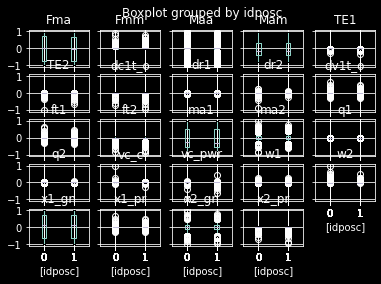

In [ ]:
sigtr.boxplot(by='idposc')

idposc
0    [[AxesSubplot(0.125,0.758226;0.125x0.121774), ...
1    [[AxesSubplot(0.125,0.758226;0.125x0.121774), ...
dtype: object

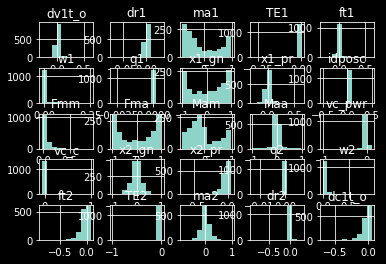

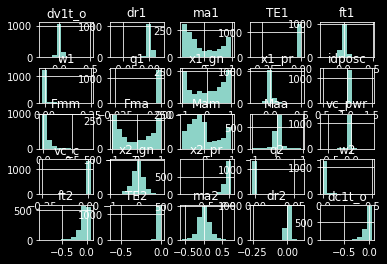

In [ ]:
sigtr.groupby('idposc').hist()

In [ ]:
sigtr[sigtr.idposc==0].drop(['idposc'],axis=1).describe()

,dv1t_o,dr1,ma1,TE1,ft1,w1,q1,x1_gn,x1_pr,Fmm,...,vc_c,x2_gn,x2_pr,q2,w2,ft2,TE2,ma2,dr2,dc1t_o
count,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,...,1343.000000,1343.000000,1343.000000,1.343000e+03,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000
mean,0.000720,0.000996,-0.050180,-0.002432,-0.000586,-0.008699,0.000017,0.056440,0.000565,0.036279,...,0.000949,-0.007359,-0.030498,-3.676958e-07,0.012865,-0.040358,-0.005243,0.002938,-0.003086,-0.030350
std,0.048653,0.004449,0.580822,0.012860,0.052589,0.022519,0.000082,0.693353,0.048828,0.071416,...,0.028924,0.219675,0.065845,5.550654e-04,0.061154,0.079821,0.034608,0.172046,0.033871,0.065854
min,-0.291475,-0.072517,-0.757779,-0.281972,-0.324141,-0.014836,-0.002847,-0.999999,-0.290536,-0.026363,...,-0.069358,-1.000000,-0.682086,-1.280274e-02,-0.009290,-0.857458,-1.000000,-0.865230,-0.874815,-0.682023
25%,-0.014195,0.000096,-0.562673,-0.001303,-0.014761,-0.014836,0.000017,-0.647184,-0.014310,-0.005787,...,-0.000271,-0.136049,-0.054556,-9.722853e-06,-0.009290,-0.068341,-0.001679,-0.086597,-0.008036,-0.054183
50%,-0.001394,0.001526,-0.275956,0.000852,0.000814,-0.014836,0.000018,0.148765,-0.001874,0.013560,...,-0.000095,-0.005914,-0.016488,1.664444e-06,-0.009290,-0.020097,0.000688,0.002201,-0.000508,-0.016343
75%,0.010848,0.002851,0.540801,0.001453,0.011255,-0.014836,0.000019,0.707387,0.011076,0.054883,...,0.000042,0.120945,0.012676,2.585305e-05,-0.009290,0.008104,0.001074,0.083684,0.005659,0.012745
max,0.637649,0.032098,0.977017,0.001652,0.630744,0.254289,0.000532,0.999997,0.639539,0.905710,...,1.000000,1.000000,0.054284,6.205051e-03,0.949497,0.080846,0.001205,0.981194,0.254764,0.054202


In [ ]:
sigtr[sigtr.idposc==1].drop(['idposc'],axis=1).describe()

,dv1t_o,dr1,ma1,TE1,ft1,w1,q1,x1_gn,x1_pr,Fmm,...,vc_c,x2_gn,x2_pr,q2,w2,ft2,TE2,ma2,dr2,dc1t_o
count,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,...,1343.000000,1343.000000,1343.000000,1.343000e+03,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000
mean,0.007545,0.001040,-0.050323,-0.003046,0.005020,-0.008974,-0.000005,0.056375,0.007408,0.047697,...,-0.000402,-0.008667,-0.030783,5.395813e-05,-0.000172,-0.050362,-0.008111,0.010875,0.002761,-0.030637
std,0.051055,0.004456,0.582530,0.015049,0.058429,0.022283,0.000731,0.693378,0.051153,0.084740,...,0.007723,0.213931,0.079895,1.646562e-03,0.034321,0.096428,0.032947,0.167927,0.014940,0.079908
min,-0.281780,-0.070623,-0.752696,-0.313414,-0.364319,-0.014836,-0.026680,-1.000000,-0.280748,-0.025654,...,-0.252108,-0.925592,-0.916144,-3.289961e-03,-0.009290,-0.900074,-0.620532,-0.573477,-0.251166,-0.915961
25%,-0.010690,0.000284,-0.563467,-0.001526,-0.014761,-0.014836,0.000017,-0.646579,-0.011237,-0.002917,...,-0.000247,-0.133242,-0.052814,-7.714750e-06,-0.009290,-0.083515,-0.004980,-0.080576,-0.002850,-0.052646
50%,0.000416,0.001421,-0.282229,0.000818,0.002633,-0.014836,0.000018,0.149661,0.000362,0.018537,...,-0.000105,-0.007392,-0.012452,-1.266233e-07,-0.009290,-0.023764,0.000367,0.002566,0.003375,-0.012295
75%,0.016119,0.002742,0.538067,0.001393,0.016772,-0.014836,0.000019,0.707787,0.016264,0.067212,...,0.000046,0.118100,0.018680,1.581001e-05,-0.009290,0.007797,0.001026,0.103392,0.007757,0.018742
max,0.506850,0.022137,0.979160,0.001660,0.485362,0.250632,0.000214,0.999995,0.505611,0.814509,...,0.014880,0.806861,0.054737,5.932317e-02,0.497909,0.087534,0.001182,0.742085,0.103737,0.054577


In [ ]:
# sigtr.corr()

In [ ]:
# sigtr.plot.scatter('dv1t_o','dc1t_o')
# plt.show()
# sigtr.plot.scatter('vc_pwr','dc1t_o')
# plt.show()
# sigtr.plot.scatter('vc_c','dc1t_o')
# plt.show()
# sigtr.plot.scatter('w1','dc1t_o')
# plt.show()
# sigtr.plot.scatter('w2','dc1t_o')
# plt.show()
# sigtr.plot.scatter('ft1','dc1t_o')
# plt.show()
# sigtr.plot.scatter('ft2','dc1t_o')
# plt.show()
# sigtr.plot.scatter('TE1','dc1t_o')
# plt.show()
# sigtr.plot.scatter('TE2','dc1t_o')
# plt.show()
# sigtr.plot.scatter('ma1','dc1t_o')
# plt.show()
# sigtr.plot.scatter('ma2','dc1t_o')
# plt.show()
# sigtr.plot.scatter('q1','dc1t_o')
# plt.show()
# sigtr.plot.scatter('q2','dc1t_o')
# plt.show()
# sigtr.plot.scatter('dr1','dc1t_o')
# plt.show()
# sigtr.plot.scatter('dr2','dc1t_o')
# plt.show()
# sigtr.plot.scatter('x1_gn','dc1t_o')
# plt.show()
# sigtr.plot.scatter('x2_gn','dc1t_o')
# plt.show()
# sigtr.plot.scatter('x1_pr','dc1t_o')
# plt.show()
# sigtr.plot.scatter('x2_pr','dc1t_o')
# plt.show()

In [ ]:
sigtr0=sigtr[sigtr.idposc==0].drop('idposc',axis=1)
sigtr1=sigtr[sigtr.idposc==1].drop('idposc',axis=1)

array([[<AxesSubplot:title={'center':'dv1t_o'}>,
        <AxesSubplot:title={'center':'dr1'}>,
        <AxesSubplot:title={'center':'ma1'}>,
        <AxesSubplot:title={'center':'TE1'}>,
        <AxesSubplot:title={'center':'ft1'}>],
       [<AxesSubplot:title={'center':'w1'}>,
        <AxesSubplot:title={'center':'q1'}>,
        <AxesSubplot:title={'center':'x1_gn'}>,
        <AxesSubplot:title={'center':'x1_pr'}>,
        <AxesSubplot:title={'center':'Fmm'}>],
       [<AxesSubplot:title={'center':'Fma'}>,
        <AxesSubplot:title={'center':'Mam'}>,
        <AxesSubplot:title={'center':'Maa'}>,
        <AxesSubplot:title={'center':'vc_pwr'}>,
        <AxesSubplot:title={'center':'vc_c'}>],
       [<AxesSubplot:title={'center':'x2_gn'}>,
        <AxesSubplot:title={'center':'x2_pr'}>,
        <AxesSubplot:title={'center':'q2'}>,
        <AxesSubplot:title={'center':'w2'}>,
        <AxesSubplot:title={'center':'ft2'}>],
       [<AxesSubplot:title={'center':'TE2'}>,
        <AxesSubplo

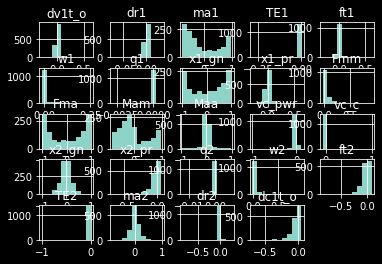

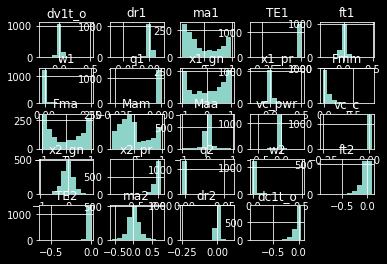

In [ ]:
sigtr0.hist()
sigtr1.hist()

In [ ]:
# sigtr.groupby('idposc').plot.scatter('dv1t_o','dc1t_o')
# plt.show()
# sigtr.groupby('idposc').plot.scatter('vc_pwr','dc1t_o')
# plt.show()
# sigtr.groupby('idposc').plot.scatter('vc_c','dc1t_o')
# plt.show()
# sigtr.groupby('idposc').plot.scatter('ft1','dc1t_o')
# plt.show()
# sigtr.groupby('idposc').plot.scatter('ft2','dc1t_o')
# plt.show()
# sigtr.groupby('idposc').plot.scatter('TE1','dc1t_o')
# plt.show()
# sigtr.groupby('idposc').plot.scatter('TE2','dc1t_o')
# plt.show()
# sigtr.groupby('idposc').plot.scatter('ma1','dc1t_o')
# plt.show()
# sigtr.groupby('idposc').plot.scatter('ma2','dc1t_o')
# plt.show()
# sigtr.groupby('idposc').plot.scatter('q1','dc1t_o')
# plt.show()
# sigtr.groupby('idposc').plot.scatter('q2','dc1t_o')
# plt.show()
# sigtr.groupby('idposc').plot.scatter('dr1','dc1t_o')
# plt.show()
# sigtr.groupby('idposc').plot.scatter('dr2','dc1t_o')
# plt.show()
# sigtr.groupby('idposc').plot.scatter('w1','dc1t_o')
# plt.show()
# sigtr.groupby('idposc').plot.scatter('w2','dc1t_o')
# plt.show()
# sigtr.groupby('idposc').plot.scatter('x1_gn','dc1t_o')
# plt.show()
# sigtr.groupby('idposc').plot.scatter('x2_gn','dc1t_o')
# plt.show()
# sigtr.groupby('idposc').plot.scatter('x1_pr','dc1t_o')
# plt.show()
# sigtr.groupby('idposc').plot.scatter('x2_pr','dc1t_o')
# plt.show()

In [ ]:
sigtr[['x1_gn','x2_gn']].groupby(sigtr.idposc).describe()

x1_gn                                                              \
         count      mean       std       min       25%       50%       75%   
idposc                                                                       
0       1343.0  0.056440  0.693353 -0.999999 -0.647184  0.148765  0.707387   
1       1343.0  0.056375  0.693378 -1.000000 -0.646579  0.149661  0.707787   

                   x2_gn                                                    \
             max   count      mean       std       min       25%       50%   
idposc                                                                       
0       0.999997  1343.0 -0.007359  0.219675 -1.000000 -0.136049 -0.005914   
1       0.999995  1343.0 -0.008667  0.213931 -0.925592 -0.133242 -0.007392   

                            
             75%       max  
idposc                      
0       0.120945  1.000000  
1       0.118100  0.806861

In [ ]:
sigtr[['x1_pr','x2_pr']].groupby(sigtr.idposc).describe()

x1_pr                                                              \
         count      mean       std       min       25%       50%       75%   
idposc                                                                       
0       1343.0  0.000565  0.048828 -0.290536 -0.014310 -0.001874  0.011076   
1       1343.0  0.007408  0.051153 -0.280748 -0.011237  0.000362  0.016264   

                   x2_pr                                                    \
             max   count      mean       std       min       25%       50%   
idposc                                                                       
0       0.639539  1343.0 -0.030498  0.065845 -0.682086 -0.054556 -0.016488   
1       0.505611  1343.0 -0.030783  0.079895 -0.916144 -0.052814 -0.012452   

                            
             75%       max  
idposc                      
0       0.012676  0.054284  
1       0.018680  0.054737

In [ ]:
sigtr[['w1','w2']].groupby(sigtr.idposc).describe()

w1                                                              \
         count      mean       std       min       25%       50%       75%   
idposc                                                                       
0       1343.0 -0.008699  0.022519 -0.014836 -0.014836 -0.014836 -0.014836   
1       1343.0 -0.008974  0.022283 -0.014836 -0.014836 -0.014836 -0.014836   

                      w2                                                 \
             max   count      mean       std      min      25%      50%   
idposc                                                                    
0       0.254289  1343.0  0.012865  0.061154 -0.00929 -0.00929 -0.00929   
1       0.250632  1343.0 -0.000172  0.034321 -0.00929 -0.00929 -0.00929   

                           
            75%       max  
idposc                     
0      -0.00929  0.949497  
1      -0.00929  0.497909

In [ ]:
sigtr[['dr1','dr2']].groupby(sigtr.idposc).describe()

dr1                                                              \
         count      mean       std       min       25%       50%       75%   
idposc                                                                       
0       1343.0  0.000996  0.004449 -0.072517  0.000096  0.001526  0.002851   
1       1343.0  0.001040  0.004456 -0.070623  0.000284  0.001421  0.002742   

                     dr2                                                    \
             max   count      mean       std       min       25%       50%   
idposc                                                                       
0       0.032098  1343.0 -0.003086  0.033871 -0.874815 -0.008036 -0.000508   
1       0.022137  1343.0  0.002761  0.014940 -0.251166 -0.002850  0.003375   

                            
             75%       max  
idposc                      
0       0.005659  0.254764  
1       0.007757  0.103737

In [ ]:
sigtr[['ft1','ft2']].groupby(sigtr.idposc).describe()

ft1                                                              \
         count      mean       std       min       25%       50%       75%   
idposc                                                                       
0       1343.0 -0.000586  0.052589 -0.324141 -0.014761  0.000814  0.011255   
1       1343.0  0.005020  0.058429 -0.364319 -0.014761  0.002633  0.016772   

                     ft2                                                    \
             max   count      mean       std       min       25%       50%   
idposc                                                                       
0       0.630744  1343.0 -0.040358  0.079821 -0.857458 -0.068341 -0.020097   
1       0.485362  1343.0 -0.050362  0.096428 -0.900074 -0.083515 -0.023764   

                            
             75%       max  
idposc                      
0       0.008104  0.080846  
1       0.007797  0.087534

In [ ]:
sigtr[['TE1','TE2']].groupby(sigtr.idposc).describe()

TE1                                                              \
         count      mean       std       min       25%       50%       75%   
idposc                                                                       
0       1343.0 -0.002432  0.012860 -0.281972 -0.001303  0.000852  0.001453   
1       1343.0 -0.003046  0.015049 -0.313414 -0.001526  0.000818  0.001393   

                     TE2                                                    \
             max   count      mean       std       min       25%       50%   
idposc                                                                       
0       0.001652  1343.0 -0.005243  0.034608 -1.000000 -0.001679  0.000688   
1       0.001660  1343.0 -0.008111  0.032947 -0.620532 -0.004980  0.000367   

                            
             75%       max  
idposc                      
0       0.001074  0.001205  
1       0.001026  0.001182

In [ ]:
sigtr[['ma1','ma2']].groupby(sigtr.idposc).describe()

ma1                                                              \
         count      mean       std       min       25%       50%       75%   
idposc                                                                       
0       1343.0 -0.050180  0.580822 -0.757779 -0.562673 -0.275956  0.540801   
1       1343.0 -0.050323  0.582530 -0.752696 -0.563467 -0.282229  0.538067   

                     ma2                                                    \
             max   count      mean       std       min       25%       50%   
idposc                                                                       
0       0.977017  1343.0  0.002938  0.172046 -0.865230 -0.086597  0.002201   
1       0.979160  1343.0  0.010875  0.167927 -0.573477 -0.080576  0.002566   

                            
             75%       max  
idposc                      
0       0.083684  0.981194  
1       0.103392  0.742085

In [ ]:
sigtr[['q1','q2']].groupby(sigtr.idposc).describe()

q1                                                              \
         count      mean       std       min       25%       50%       75%   
idposc                                                                       
0       1343.0  0.000017  0.000082 -0.002847  0.000017  0.000018  0.000019   
1       1343.0 -0.000005  0.000731 -0.026680  0.000017  0.000018  0.000019   

                      q2                                              \
             max   count          mean       std       min       25%   
idposc                                                                 
0       0.000532  1343.0 -3.676958e-07  0.000555 -0.012803 -0.000010   
1       0.000214  1343.0  5.395813e-05  0.001647 -0.003290 -0.000008   

                                          
                 50%       75%       max  
idposc                                    
0       1.664444e-06  0.000026  0.006205  
1      -1.266233e-07  0.000016  0.059323

In [ ]:
sigtr[['vc_pwr','vc_c']].groupby(sigtr.idposc).describe()

vc_pwr                                                              \
         count      mean       std       min       25%       50%       75%   
idposc                                                                       
0       1343.0 -0.002832  0.032323 -1.000000 -0.000794  0.000289  0.000966   
1       1343.0 -0.004976  0.033618 -0.610217 -0.001757  0.000241  0.000709   

                    vc_c                                                    \
             max   count      mean       std       min       25%       50%   
idposc                                                                       
0       0.114448  1343.0  0.000949  0.028924 -0.069358 -0.000271 -0.000095   
1       0.429383  1343.0 -0.000402  0.007723 -0.252108 -0.000247 -0.000105   

                           
             75%      max  
idposc                     
0       0.000042  1.00000  
1       0.000046  0.01488

In [ ]:
sig.corr()

,dv1t_o,dr1,ma1,TE1,ft1,w1,q1,x1_gn,x1_pr,idposc,...,vc_c,x2_gn,x2_pr,q2,w2,ft2,TE2,ma2,dr2,dc1t_o
dv1t_o,1.000000,0.220349,-0.000092,-0.055641,0.724829,-0.304814,0.000512,9.217351e-05,0.998226,0.044847,...,0.000032,-6.599655e-03,-0.102948,0.001317,-0.023905,-0.089674,-0.129725,0.008054,0.003134,-0.103005
dr1,0.220349,1.000000,-0.009823,-0.013960,0.022885,-0.808831,0.000986,1.018138e-02,0.219354,0.019257,...,0.001367,-1.947640e-03,-0.001806,-0.001705,0.030938,0.004661,0.013991,0.000007,-0.004667,-0.001822
ma1,-0.000092,-0.009823,1.000000,0.002091,-0.004905,0.020308,-0.003860,-9.858426e-01,0.058597,-0.028657,...,-0.005626,3.023906e-06,-0.001945,0.006766,-0.017681,0.010864,0.019576,-0.010212,0.001551,-0.001945
TE1,-0.055641,-0.013960,0.002091,1.000000,0.330832,0.024622,-0.000569,4.553088e-03,-0.055813,-0.116972,...,-0.000186,3.618893e-03,0.007597,-0.000298,0.006259,0.023683,0.307422,-0.007262,0.002707,0.007627
ft1,0.724829,0.022885,-0.004905,0.330832,1.000000,-0.085624,-0.000420,7.291824e-03,0.723113,0.026912,...,0.001513,-2.543534e-03,-0.108910,0.000696,-0.017681,-0.104768,-0.146307,0.002964,-0.000414,-0.108934
w1,-0.304814,-0.808831,0.020308,0.024622,-0.085624,1.000000,-0.001154,-2.069695e-02,-0.303043,-0.067676,...,-0.002517,2.765905e-03,0.002764,0.001331,-0.069647,0.004129,0.003430,-0.001567,0.003912,0.002787
q1,0.000512,0.000986,-0.003860,-0.000569,-0.000420,-0.001154,1.000000,3.863346e-03,0.000281,0.000636,...,-0.000052,7.644245e-04,0.000845,0.000101,-0.010499,-0.000199,-0.000552,-0.000716,0.005387,0.000851
x1_gn,0.000092,0.010181,-0.985843,0.004553,0.007292,-0.020697,0.003863,1.000000e+00,-0.059440,0.026318,...,0.005689,2.332415e-13,0.002088,-0.007529,0.019481,-0.009043,-0.012213,0.000024,-0.001522,0.002088
x1_pr,0.998226,0.219354,0.058597,-0.055813,0.723113,-0.303043,0.000281,-5.943955e-02,1.000000,0.043201,...,-0.000307,-6.587987e-03,-0.102890,0.001763,-0.025022,-0.088977,-0.128769,0.008039,0.003219,-0.102947
idposc,0.044847,0.019257,-0.028657,-0.116972,0.026912,-0.067676,0.000636,2.631770e-02,0.043201,1.000000,...,-0.005235,-2.412267e-03,0.304406,0.001665,-0.013198,0.180543,-0.155148,0.007992,0.049122,0.304394


In [ ]:
from sklearn import model_selection as ms
xtrain,xtest,ytrain,ytest = ms.train_test_split(sig.drop(['idposc','dv1t_o','dc1t_o'],axis=1),sig.idposc,test_size=0.4)

xytrain = xtrain.join(ytrain).corr()

In [ ]:
xtrain.head()

,dr1,ma1,TE1,ft1,w1,q1,x1_gn,x1_pr,Fmm,Fma,...,vc_pwr,vc_c,x2_gn,x2_pr,q2,w2,ft2,TE2,ma2,dr2
dt,,,,,,,,,,,,,,,,,,,,,
2020-07-06 20:15:00,-0.004875,-0.501184,0.001595,-0.001493,0.036152,0.000008,0.588152,-0.008762,-0.020796,0.039172,...,0.000395,-0.000039,-0.003279,-0.004131,1.082617e-05,-0.00929,0.003191,0.001154,-0.006727,0.000558
2020-03-13 18:15:00,-0.022709,-0.154411,0.000281,-0.050007,0.130115,0.000014,-0.041227,-0.060524,0.025319,-0.104099,...,0.001082,-0.000071,-0.183995,-0.004736,7.995198e-06,-0.00929,0.012555,0.000100,0.221155,0.001390
2020-01-05 08:15:00,-0.001410,0.227183,0.001611,0.003158,-0.014836,0.000025,-0.368167,-0.001552,-0.025159,0.091352,...,0.000320,-0.000079,0.147468,-0.000260,3.852664e-06,-0.00929,0.003424,0.001168,-0.140059,0.002868
2020-12-06 08:45:00,-0.004559,-0.696709,0.001593,-0.004374,0.032855,0.000007,0.967429,-0.016293,-0.014987,0.468884,...,0.000785,-0.000012,-0.282482,-0.012916,8.023199e-07,-0.00929,-0.005202,0.000846,0.145508,0.004219
2020-01-16 07:30:00,0.000255,0.927848,0.001607,0.008135,-0.014836,0.000019,-0.971484,0.005969,-0.022916,-0.263253,...,0.000317,-0.000085,-0.203936,-0.000322,-1.516800e-06,-0.00929,0.002064,0.001162,0.265115,0.005446


In [ ]:
xytrain.corr()

,dr1,ma1,TE1,ft1,w1,q1,x1_gn,x1_pr,Fmm,Fma,...,vc_c,x2_gn,x2_pr,q2,w2,ft2,TE2,ma2,dr2,idposc
dr1,1.000000,-0.026655,-0.049334,0.136636,-0.969405,-0.014781,0.025549,0.397809,0.091844,-0.078521,...,-0.014591,-0.006889,-0.047475,-0.013924,0.070700,-0.037744,-0.031566,-0.000540,-0.028313,0.058050
ma1,-0.026655,1.000000,-0.000785,-0.014321,0.038128,-0.034393,-0.997946,0.070669,-0.035539,-0.022956,...,-0.028833,0.003698,-0.036348,-0.003056,-0.030334,-0.014648,0.023549,-0.016207,-0.009337,-0.106381
TE1,-0.049334,-0.000785,1.000000,0.373069,0.064817,-0.045750,0.007335,-0.040092,-0.875857,0.003701,...,-0.041803,-0.001449,0.004719,-0.038678,0.025143,0.135343,0.591772,-0.014289,-0.051467,-0.435286
ft1,0.136636,-0.014321,0.373069,1.000000,-0.224509,-0.051111,0.012134,0.850783,-0.078581,-0.173481,...,-0.042287,-0.018319,-0.339977,-0.040594,-0.010824,-0.326121,-0.206759,0.006068,-0.026845,-0.084777
w1,-0.969405,0.038128,0.064817,-0.224509,1.000000,0.007712,-0.037039,-0.497169,-0.144792,0.106795,...,0.005886,0.007388,0.053498,0.005777,-0.096161,0.051021,0.070994,-0.001921,0.038225,-0.126740
q1,-0.014781,-0.034393,-0.045750,-0.051111,0.007712,1.000000,0.031187,-0.048820,0.023708,-0.038844,...,-0.044780,-0.002302,-0.072311,-0.044886,-0.026260,-0.073785,-0.051082,-0.008491,-0.001389,-0.059387
x1_gn,0.025549,-0.997946,0.007335,0.012134,-0.037039,0.031187,1.000000,-0.076652,0.026108,0.019873,...,0.026161,0.000412,0.032573,0.000235,0.031665,0.013014,-0.017930,0.010182,0.006920,0.096967
x1_pr,0.397809,0.070669,-0.040092,0.850783,-0.497169,-0.048820,-0.076652,1.000000,0.274953,-0.184239,...,-0.045273,-0.017779,-0.333800,-0.033419,-0.018334,-0.346962,-0.358363,0.006566,-0.011858,0.063654
Fmm,0.091844,-0.035539,-0.875857,-0.078581,-0.144792,0.023708,0.026108,0.274953,1.000000,-0.073078,...,0.019378,-0.002645,-0.221247,0.011932,-0.052902,-0.410493,-0.831495,0.012974,0.081843,0.566821
Fma,-0.078521,-0.022956,0.003701,-0.173481,0.106795,-0.038844,0.019873,-0.184239,-0.073078,1.000000,...,-0.044721,-0.012791,0.109213,-0.058970,0.024520,0.079878,0.057389,-0.003817,-0.033078,-0.020256


In [ ]:
t = np.abs(xytrain.corr()['idposc']) >= 0.08
t

dr1       False
ma1        True
TE1        True
ft1        True
w1         True
q1        False
x1_gn      True
x1_pr     False
Fmm        True
Fma       False
Mam        True
Maa       False
vc_pwr     True
vc_c       True
x2_gn     False
x2_pr      True
q2        False
w2         True
ft2        True
TE2        True
ma2       False
dr2        True
idposc     True
Name: idposc, dtype: bool

In [ ]:
s= t.index[t==True]
xtrain_sel = xytrain[s.drop('idposc').tolist()]
xtrain_sel

,ma1,TE1,ft1,w1,x1_gn,Fmm,Mam,vc_pwr,vc_c,x2_pr,w2,ft2,TE2,dr2
dr1,-0.009107,-0.012446,0.020826,-0.793147,0.009398,0.026190,-0.005287,-0.000160,0.000462,-0.002412,0.029385,0.005450,0.012355,-0.005393
ma1,1.000000,0.002551,-0.005591,0.021475,-0.985815,-0.018635,0.779186,0.010618,-0.002734,0.000099,-0.016365,0.011780,0.019766,-0.001725
TE1,0.002551,1.000000,0.352234,0.024339,0.004547,-0.663439,0.025944,0.317318,-0.000984,-0.000003,0.004116,0.016267,0.306900,0.000673
ft1,-0.005591,0.352234,1.000000,-0.085870,0.007626,-0.118669,0.002146,-0.084680,0.003358,-0.119392,-0.016972,-0.112693,-0.124525,-0.001285
w1,0.021475,0.024339,-0.085870,1.000000,-0.021454,-0.077617,0.015456,0.004796,-0.001719,0.005466,-0.070005,0.002604,0.003171,0.005416
q1,-0.004801,-0.000712,-0.000637,-0.001242,0.004840,0.003067,-0.003053,-0.000183,-0.000089,0.001001,-0.013104,-0.000289,-0.000671,0.006424
x1_gn,-0.985815,0.004547,0.007626,-0.021454,1.000000,0.008506,-0.666506,-0.008514,0.003269,0.000306,0.017587,-0.009986,-0.012579,0.001670
x1_pr,0.062652,-0.015054,0.716885,-0.307922,-0.064000,0.188474,0.040809,-0.115927,-0.000201,-0.108251,-0.024656,-0.091144,-0.107730,0.002717
Fmm,-0.018635,-0.663439,-0.118669,-0.077617,0.008506,1.000000,-0.048725,-0.295780,0.001770,-0.103589,-0.041214,-0.259673,-0.551336,0.039622
Fma,0.002912,0.014879,-0.045168,0.048469,-0.002119,-0.032475,0.003065,0.098758,0.006053,0.091872,0.022580,0.047744,0.024310,-0.003874


In [ ]:
import sklearn.ensemble as en
from sklearn.model_selection import cross_val_score as cvs
from sklearn.linear_model import LogisticRegressionCV as lrcv
gbc = en.GradientBoostingClassifier(random_state=1)
logrcv = lrcv()
